# 1.Selenium이란?
* 웹브라우저를 자동으로 제어하는 라이브러리
* 원래 다양한 웹브라우저를 자동으로 테스트하는 테스트 도구
* 동적 웹사이트에서 정보를 가져오는데 활동

In [ ]:
# !pip install selenium
# !pip install webdriver-manager

In [94]:
import selenium
print(selenium.__version__)

4.31.1


In [104]:
# selenium 4
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import time
import pandas as pd

# 크롬 옵션즈에 정보를 담아 사람인 것 처럼 만들기
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ['enable-logging'])
options.add_argument("Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36")
options.add_argument('lang=ko_KR')

# 크롬 웹브라우저 드라이버 자동 다운로드
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver.set_window_size(1920, 1080) # 웹브라우저 해상도 조절
driver.get("https://search.shopping.naver.com/book/home")

In [105]:
#lnb > div > div._lnbSearch_lnb_search_10s9T > div > div > form > input
search_box = driver.find_element(By.CSS_SELECTOR, "#lnb > div > div._lnbSearch_lnb_search_10s9T > div > div > form > input")
search_box.send_keys("핀테크"+Keys.ENTER)

In [97]:
#lnb > div > div._lnbSearch_lnb_search_10s9T > div > div > form > button
search_button = driver.find_element(By.CSS_SELECTOR, "#lnb > div > div._lnbSearch_lnb_search_10s9T > div > div > form > button")
search_button.click()

In [5]:
page_html = driver.page_source

In [6]:
soup = bs(page_html, 'lxml')

'<html lang="ko"><head><meta charset="utf-8"><meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate"><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no"><title>핀테크 : 네이버 도서</title><link rel="shortcut icon" href="https://ssl.pstatic.net/shoppingsearch/static/book/book-240730-142747/img/favicon.ico"><link rel="apple-touch-icon" href="https://ssl.pstatic.net/shoppingsearch/static/book/book-240730-142747/img/favicon_180.png"><meta property="og:title" content="핀테크 : 네이버 도서"><meta property="og:description" content="\'핀테크\'의 네이버 도서 검색 결과입니다."><meta property="og:image" content="https://ssl.pstatic.net/imgshopping/static/mo2014/icon/og_shopping_v2.png"><meta property="og:url" content="https://search.shopping.naver.com/book?query=%ED%95%80%ED%85%8C%ED%81%AC"><meta name="next-head-count" content="10"><link rel="preconnect" href="https://static.nid.naver.com"><link rel="preconnect" href
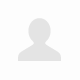
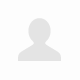

In [7]:
page_html

In [39]:
book_list = soup.select(".list_book > li")

In [42]:
book_list = soup.select(".list_book > li")
book_list[0]

<li class="bookListItem_item_book__X0Yfi"><div class="bookListItem_item_inner__9LmpD"><a class="bookListItem_info_top__r54Eg linkAnchor _nlog_click _nlog_impression_element" data-i="32484946668" data-shp-area="bok_sch*c.pd" data-shp-area-dtl='[{"key":"trtr","value":"boksl"}]' data-shp-area-id="pd" data-shp-area-type="slot" data-shp-contents-dtl='[{"key":"prod_nm","value":"핀테크 규제와 실무(2020)"},{"key":"lowest_price","value":"0"},{"key":"pagination","value":"2"},{"key":"bookTabType","value":"ALL"},{"key":"isAnswerBook","value":"n"}]' data-shp-contents-grp="catalog" data-shp-contents-id="32484946668" data-shp-contents-rank="1" data-shp-contents-type="catalog_nv_mid" data-shp-inventory="bok_sch*c" data-shp-nsc="shopping.book" data-shp-page-key="100388780" data-shp-temp="[]" href="https://cr3.shopping.naver.com/book/adcr?x=qH%2BaDHF1kE4fAQW2HJGdfv%2F%2F%2Fw%3D%3DsPep0CpIG%2FZkTFAgdOJ7vbSxlWJyWoF0YciaQE3BXGVoRVtJj6kaQPo%2BZj4JWOC9OVkmpNYx7h2ajBntbwLmOjNof6jW5jHdz%2FbROY2pgmynSDVw69efgU06EIDHX8L

In [29]:
page_html = driver.page_source
soup = bs(page_html, 'lxml')
book_list = soup.select(".list_book > li")
#book_list[0]
for book in book_list:
    title = book.select_one("span.bookListItem_text__SL9m9").text # 책제목
    author = book.select("span.bookListItem_define_data__IUMgt")[0].text # 저자
    publisher = book.select("span.bookListItem_define_data__IUMgt")[1].text # 출판사
    pub_date = book.select_one("div.bookListItem_detail_date__s7KQe").text.strip(". ").replace(".","-") #출간일

    if book.select("span.bookPrice_price__OagxI") != None:
        if len(book.select("span.bookPrice_price__OagxI")) == 2:
            price = book.select("span.bookPrice_price__OagxI")[0].text.split(" ")[1].replace(",", "").replace("원", "") # 종이책
            eb_price = book.select("span.bookPrice_price__OagxI")[1].text.split(" ")[1].replace(",", "").replace("원", "") # e북
        elif len(book.select("span.bookPrice_price__OagxI")) == 1:
            price = book.select("span.bookPrice_price__OagxI")[0].text.split(" ")[1].replace(",", "").replace("원", "")
            eb_price = 0
    else:
        price = 0
        eb_price = 0
    print(title, author, publisher, pub_date, price, eb_price)


핀테크 규제와 실무(2020) (지급결제와 본인증편) 예자선 삼일인포마인 2020-05-04 342000 0
핀테크(Fintech) 3.0 (핀테크 혁명과 금융의 미래) 김종현 한국금융연수원 2015-08-31 342000 0
핀테크(Fintech) 3.0 (핀테크 혁명과 금융의 미래) 김종현 한국금융연수원 2016-09-05 342000 0
핀테크 산업분야 주식투자 가이드 비티타임즈 편집부 비티타임즈 2021-04-26 27000 0
김변이 알려주는 핀테크의 비밀 (알아야 돈이 보인다) 김도형 삼일인포마인 2019-07-01 27000 0
김변이 알려주는 핀테크의 비밀 김도형 삼일인포마인 2019-01-24 17100 0
4차 산업혁명시대 핀테크 개인정보보호 (핀테크 기업과 이용자를 위한 개인정보보호 핵심 가이드) 백남정 지식플랫폼 2019-03-20 13500 9450
핀테크 산업분석보고서(2019) (개정판) 비피기술거래, 비피제이기술거래 비티타임즈 2019-03-25 59400 0
핀테크 산업분석보고서(2018) (개정판) 비피기술거래 비티타임즈 2017-11-06 54000 0
4차 산업혁명과 글로벌 핀테크 for 창업 김영국 박영사 2018-12-30 28420 18270
김변이 알려주는 핀테크의 비밀 (2021) (알아야 돈이 보인다) 김도형 삼일인포마인 2021-03-02 14400 0
중국 핀테크 산업 성장과 규제완화 (정책연구 2016-27) 서봉교 한국경제연구원 2017-01-19 14400 0
국내외 핀테크 산업분석보고서(2023) (개정판) 비피기술거래, 비피제이기술거래 비티타임즈 2023-03-13 59400 45000
전자금융과 핀테크의 이해(2016) (금융사고와 범죄 방지 및 소비자보호를 중심으로) 이충열, 정군오 kif 2016-06-21 59400 45000
핀테크 혁신, 미래 산업과 금융의 판을 바꾸다 (한국 핀테크 산업의 현주소와 차기 정부의 과제) 이석근 북랩 2017-03-23 13320 6660
금융혁신, 핀테크 그리

IndexError: list index out of range

In [30]:
# 제목 span태그 안에
book_list[0].select_one("span.bookListItem_text__SL9m9").text

'핀테크 규제와 실무(2020) (지급결제와 본인증편)'

In [31]:
# 저자
book_list[0].select("span.bookListItem_define_data__IUMgt")[0].text

'예자선'

In [32]:
# 출판사
book_list[0].select("span.bookListItem_define_data__IUMgt")[1].text

'삼일인포마인'

In [45]:
# 종이책 가격
#book_list[0].select("span.bookPrice_price__OagxI")[0].text
book_list[0].select_one("span.bookPrice_price__OagxI")[0].text.split(" ")[1].replace(",", "").replace("원", "")

TypeError: 'NoneType' object is not subscriptable

In [44]:
# e북 가격
book.select("span.bookPrice_price__OagxI")[1].text.split(" ")[1].replace(",", "").replace("원", "") # e북

IndexError: list index out of range

In [35]:
# 출판일
book_list[0].select_one("div.bookListItem_detail_date__s7KQe").text.strip(". ")[1].replace(".","-")
#book_list[0].select_one("bookListItem_detail_date__s7KQe")[1].text.strip(". ")[1].replace(".","-")

'0'

# 마우스를 스크롤해서 40개 정보 가져오기
* "window.scrollTo({시작위치}, {step})" 문자열로 감싸줘야됨
* 자바스크립트를 실행해라 하는 함수

In [60]:
for i in book_list:
    kind_element = book.select('div:nth-child(1) > a > div.goods_title')
    kind = kind_element.text if kind_element else ""
    print(kind_element)
    print(kind)

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [62]:
y = 0
y_step = 1000
for scroll_times in range(1,9):
    y += y_step
    driver.execute_script(f"window.scrollTo({0}, {y})") #윈도우를 웹브라우저 절대위치 1부터 1000까지 스크롤해라
    time.sleep(2) #2초마다 스크롤 아래로
    #이제 페이지 넘겨서 copy 하는 코드 필요
    page_html = driver.page_source 
    soup = bs(page_html, 'lxml')
    book_list = soup.select(".list_book > li") # 정보 추출
for book in book_list:
    title = book.select_one("span.bookListItem_text__SL9m9").text # 책제목
    author = book.select("span.bookListItem_define_data__IUMgt")[0].text # 저자
    publisher = book.select("span.bookListItem_define_data__IUMgt")[1].text # 출판사
    pub_date = book.select_one("div.bookListItem_detail_date__s7KQe").text.strip(". ").replace(".","-") #출간일

    price_elements = book.select('span.bookPrice_price__OagxI em')
    kind_element = book.select_one('div:nth-child(1) > a > div.goods_title')
    kind = kind_element.text if kind_element else ""
    
    if price_elements:
        if len(price_elements) == 2:
            price = price_elements[0].text.replace(",", "").replace("원", "")  # 종이책 가격
            eb_price = price_elements[1].text.replace(",", "").replace("원", "") # e북
        elif len(price_elements) == 1:
            if kind == "도서":
                price = price_elements[0].text.replace(",", "").replace("원", "")  # 종이책 가격
                eb_price = 0
            elif kind == "e북":
                eb_price = price_elements[0].text.replace(",", "").replace("원", "") # e북
                price = 0
    else:
        price = 0
        eb_price = 0
    print(title, author, publisher, pub_date, price, eb_price)    
npbutton = "#container > div > div.bookSearch_book_search__Fm5Em > div > div.Paginator_list_paging__hUKRc > button"
next_page_button = driver.find_element(By.CSS_SELECTOR, npbutton) #다음 페이지 버튼
next_page_button.click()

핀테크 규제와 실무(2020) (지급결제와 본인증편) 예자선 삼일인포마인 2020-05-04 0 0
핀테크(Fintech) 3.0 (핀테크 혁명과 금융의 미래) 김종현 한국금융연수원 2015-08-31 0 0
핀테크(Fintech) 3.0 (핀테크 혁명과 금융의 미래) 김종현 한국금융연수원 2016-09-05 0 0
핀테크 산업분야 주식투자 가이드 비티타임즈 편집부 비티타임즈 2021-04-26 27000 0
김변이 알려주는 핀테크의 비밀 (알아야 돈이 보인다) 김도형 삼일인포마인 2019-07-01 0 0
김변이 알려주는 핀테크의 비밀 김도형 삼일인포마인 2019-01-24 17100 0
4차 산업혁명시대 핀테크 개인정보보호 (핀테크 기업과 이용자를 위한 개인정보보호 핵심 가이드) 백남정 지식플랫폼 2019-03-20 13500 9450
핀테크 산업분석보고서(2019) (개정판) 비피기술거래, 비피제이기술거래 비티타임즈 2019-03-25 59400 0
핀테크 산업분석보고서(2018) (개정판) 비피기술거래 비티타임즈 2017-11-06 54000 0
4차 산업혁명과 글로벌 핀테크 for 창업 김영국 박영사 2018-12-30 28420 18270
김변이 알려주는 핀테크의 비밀 (2021) (알아야 돈이 보인다) 김도형 삼일인포마인 2021-03-02 14400 0
중국 핀테크 산업 성장과 규제완화 (정책연구 2016-27) 서봉교 한국경제연구원 2017-01-19 0 0
국내외 핀테크 산업분석보고서(2023) (개정판) 비피기술거래, 비피제이기술거래 비티타임즈 2023-03-13 59400 45000
전자금융과 핀테크의 이해(2016) (금융사고와 범죄 방지 및 소비자보호를 중심으로) 이충열, 정군오 kif 2016-06-21 0 0
핀테크 혁신, 미래 산업과 금융의 판을 바꾸다 (한국 핀테크 산업의 현주소와 차기 정부의 과제) 이석근 북랩 2017-03-23 13320 6660
금융혁신, 핀테크 그리고 금융의 미래(2019) (캐나다 국민연금 시스템의 성

In [67]:
for page in range(1,7):
    # 마우스 스크롤로 40개 정보 가져옴
    y = 0
    y_step = 1000
    for scroll_times in range(1,9):
        y += y_step
        driver.execute_script(f"window.scrollTo({0}, {y})") #윈도우를 웹브라우저 절대위치 1부터 1000까지 스크롤해라
        time.sleep(2) #2초마다 스크롤 아래로
        #이제 페이지 넘겨서 copy 하는 코드 필요
        page_html = driver.page_source 
        soup = bs(page_html, 'lxml')
        book_list = soup.select(".list_book > li") # 정보 추출
    for book in book_list:
        title = book.select_one("span.bookListItem_text__SL9m9").text # 책제목
        author = book.select("span.bookListItem_define_data__IUMgt")[0].text # 저자
        publisher = book.select("span.bookListItem_define_data__IUMgt")[1].text # 출판사
        pub_date = book.select_one("div.bookListItem_detail_date__s7KQe").text.strip(". ").replace(".","-") #출간일

        if book.select("span.bookPrice_price__OagxI") != None:
            if len(book.select("span.bookPrice_price__OagxI")) == 2:
                price = book.select("span.bookPrice_price__OagxI")[0].text.split(" ")[1].replace(",", "").replace("원", "") # 종이책
                eb_price = book.select("span.bookPrice_price__OagxI")[1].text.split(" ")[1].replace(",", "").replace("원", "") # e북
            elif len(book.select("span.bookPrice_price__OagxI")) == 1:
                price = book.select("span.bookPrice_price__OagxI")[0].text.split(" ")[1].replace(",", "").replace("원", "")
                eb_price = 0
        else:
            price = 0
            eb_price = 0
        print(title, author, publisher, pub_date, price, eb_price)    
    npbutton = "#container > div > div.bookSearch_book_search__Fm5Em > div > div.Paginator_list_paging__hUKRc > button"
    next_page_button = driver.find_element(By.CSS_SELECTOR, npbutton) #다음 페이지 버튼
    next_page_button.click()

KeyboardInterrupt: 

In [ ]:
price = book.select("span.bookPrice_price__OagxI")[0].text.split(" ")[1].replace(",", "").replace("원", "")

In [ ]:
#container > div > div.bookSearch_book_search__Fm5Em > div > div.Paginator_list_paging__hUKRc > button
#container > div > div.bookSearch_book_search__Fm5Em > div > div.Paginator_list_paging__hUKRc > button

In [106]:
data = []
result = {}
final_result_df = pd.DataFrame()
for page in range(1,6):
    # 마우스 스크롤로 40개 정보 가져옴
    y = 0
    y_step = 1000
    
    for scroll_times in range(1,9):
        y += y_step
        driver.execute_script(f"window.scrollTo({0}, {y})") #윈도우를 웹브라우저 절대위치 1부터 1000까지 스크롤해라
        time.sleep(2) #2초마다 스크롤 아래로
        #이제 페이지 넘겨서 copy 하는 코드 필요
        page_html = driver.page_source 
        soup = bs(page_html, 'lxml')
        book_list = soup.select(".list_book > li") # 정보 추출
    for book in book_list:
        title = book.select_one("span.bookListItem_text__SL9m9").text # 책제목
        #author = book.select("span.bookListItem_define_data__IUMgt")[0].text # 저자
        
        author_elements = book.select("span.bookListItem_define_data__IUMgt")

        if len(author_elements) == 0:
            author = "None"   
            publisher = "None"   
        elif len(author_elements) == 1:
            if len(author_elements[0]) ==0 :
                author = "None"  
                publisher = author_elements[1].text 
            else:
                author = author_elements[0].text 
                publisher = "None"    
        else:
            author = author_elements[0].text 
            publisher = author_elements[1].text 

        if book.select_one("div.bookListItem_detail_date__s7KQe") != None:
            pub_date = book.select_one("div.bookListItem_detail_date__s7KQe").text.strip(". ").replace(".","-") #출간일
        else:
            pub_date = ""

        price_elements = book.select('span.bookPrice_price__OagxI em')
        kind_element = book.select_one('div:nth-child(1) > a > div.goods_title')
        kind = kind_element.text if kind_element else ""
        
        if price_elements:
            if len(price_elements) == 2:
                price = price_elements[0].text.replace(",", "").replace("원", "")  # 종이책 가격
                eb_price = price_elements[1].text.replace(",", "").replace("원", "") # e북
            elif len(price_elements) == 1:
                if kind == "도서":
                    price = price_elements[0].text.replace(",", "").replace("원", "")  # 종이책 가격
                    eb_price = 0
                elif kind == "e북":
                    eb_price = price_elements[0].text.replace(",", "").replace("원", "") # e북
                    price = 0
        else:
            price = 0
            eb_price = 0

    
    data = (title, author, publisher, pub_date, price, eb_price)
        keys = ("Title", "Author", "Publisher", "Pub Date", "Price", "eb_price")
        for key, itmes in zip(keys, data):
            result.setdefault(key, []).append(data)

    #npbutton = book.select_one('')
    npbutton = "#container > div > div.bookSearch_book_search__Fm5Em > div > div.Paginator_list_paging__hUKRc > button"
    npbutton2 = "#container > div > div.bookSearch_book_search__Fm5Em > div > div.Paginator_list_paging__hUKRc > button.Paginator_btn_next__7NiBL"
    if npbutton2:
        next_page_button = driver.find_element(By.CSS_SELECTOR, npbutton2) #다음 페이지 버튼
        time.sleep(2)  # 페이지가 로드될 시간을 기다림
        next_page_button.click()
    elif npbutton: 
        next_page_button2 = driver.find_element(By.CSS_SELECTOR, npbutton) #다음 페이지 버튼
        time.sleep(2)  # 페이지가 로드될 시간을 기다림
        next_page_button.click()
final_result_dffinal_result_df.to_csv("books_data.csv", index=False)
final_result_df

IndentationError: unexpected indent (1252906359.py, line 63)

In [ ]:
df = pd.DataFrame(data, columns = ["Title", "Author", "Publisher", "Pub Date", "Price", "E-Book Price"])
print(df)
final_result_df.to_csv(f"네이버책 수집.csv", encoding='utf-8', index=False)

In [52]:
book.select_one("span.bookPrice_price__OagxI em").get_text()

'27,000'

In [ ]:
#container > div > div.bookSearch_book_search__Fm5Em > div > div.Paginator_list_paging__hUKRc > button.Paginator_btn_next__7NiBL
#container > div > div.bookSearch_book_search__Fm5Em > div > div.Paginator_list_paging__hUKRc > button.Paginator_btn_next__7NiBL